## Time Series Prediction

International airline passengers prediction problem. This is a problem where given a year and a month, the task is to predict the number of
international airline passengers in units of 1,000. The data ranges from January 1949 to December
1960 or 12 years, with 144 observations. 
- https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

In [1]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
dataset = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',skipfooter=3)
dataset.head()


,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


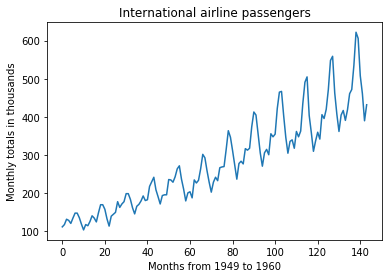

In [2]:
plt.plot(dataset)
plt.xlabel('Months from 1949 to 1960')
plt.ylabel('Monthly totals in thousands')
plt.title('International airline passengers')
plt.show()

Growing with time and periodic in nature, peaks may correspond to summer holiday time in northern hemisphere

### Multilayer Percepton Regression
Phrase the time series prediction problem as a regression problem. Given the
number of passengers (in units of thousands) this month, what is the number of passengers next
month. We can write a simple function to convert our single column of data into a two-column
dataset. The first column containing this month’s (t) passenger count and the second column
containing next month’s (t+1) passenger count, to be predicted. 

In [3]:
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(7)
#convert values to float
dataset = dataset.values.astype('float32')

C:\Users\richard\Anaconda3\envs\tf15\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
dataset[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

After modelling data for a normal classification
or regression problem could use using k-fold cross-validation to test for unseen data. With time series data,
the sequence of values is important. A simple method that we can use is to split the ordered
dataset into train and test datasets. The code below calculates the index of the split point and
separates the data into the training datasets with 67% of the observations that we can use to
train our model, leaving the remaining 33% for testing the model.

In [5]:
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train),len(test))

96 48


In [6]:
dataset[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

Create a dataset where X is
the number of passengers at a given time (t) and Y is the number of passengers at the next time (t+1).
Array above becomes:
- 112 118
- 118 132
- 132 129
- 129 121

Create a dataset where X is
the number of passengers at a given time (t) and Y is the number of passengers at the next
time (t+1).

In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [29]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [49]:
#check we have transformed the data correctly
print('t',"     ",'t+1')
for n in range(5):
    print(trainX[n], trainY.reshape(94,1)[n])

t       t+1
[112.] [118.]
[118.] [132.]
[132.] [129.]
[129.] [121.]
[121.] [135.]


Fit a Multilayer Perceptron model to the training data. We use a simple network
with 1 input, 1 hidden layer with 8 neurons and an output layer. The model is fit using mean
squared error, if we take the square root gives us an error score in the units of the dataset.

In [51]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 2s - loss: 47573.3689
Epoch 2/200
 - 0s - loss: 41638.7982
Epoch 3/200
 - 0s - loss: 35671.4853
Epoch 4/200
 - 0s - loss: 29455.6100
Epoch 5/200
 - 0s - loss: 23367.0042
Epoch 6/200
 - 0s - loss: 17667.2450
Epoch 7/200
 - 0s - loss: 12724.6766
Epoch 8/200
 - 0s - loss: 8635.7736
Epoch 9/200
 - 0s - loss: 5550.5634
Epoch 10/200
 - 0s - loss: 3407.6441
Epoch 11/200
 - 0s - loss: 2050.7950
Epoch 12/200
 - 0s - loss: 1280.0152
Epoch 13/200
 - 0s - loss: 862.0552
Epoch 14/200
 - 0s - loss: 672.6010
Epoch 15/200
 - 0s - loss: 584.1586
Epoch 16/200
 - 0s - loss: 554.7163
Epoch 17/200
 - 0s - loss: 546.6044
Epoch 18/200
 - 0s - loss: 547.3599
Epoch 19/200
 - 0s - loss: 538.8208
Epoch 20/200
 - 0s - loss: 538.5308
Epoch 21/200
 - 0s - loss: 536.9807
Epoch 22/200
 - 0s - loss: 536.0285
Epoch 23/200
 - 0s - loss: 537.1251
Epoch 24/200
 - 0s - loss: 535.7832
Epoch 25/200
 - 0s - loss: 538.2119
Epoch 26/200
 - 0s - loss: 538.4747
Epoch 27/200
 - 0s - loss: 538.2311
Epoch 28/200
 - 0s

In [52]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


Gives poor performance, model has an average error of 23 passengers (000's') on the training and 48(000's) on test

In [53]:
trainPredict = model.predict(trainX)

In [55]:
trainPredict[:5]

array([[113.74777 ],
       [119.718735],
       [133.65099 ],
       [130.66551 ],
       [122.70422 ]], dtype=float32)

### Window method
Try using a window - given the current time (t) want to predict the value at the next time in the sequence (t+1), use the current time
(t) as well as the two prior times (t-1 and t-2). When phrased as a regression problem the
input variables are t-2, t-1, t and the output variable is t+1.

- X1 X2 X3 Y
- 112 118 132 129
- 118 132 129 121
- 132 129 121 135
- 129 121 135 148
- 121 135 148 148


Re-run the example with the larger window size. Increase the network capacity to handle the additional information. The first hidden layer is
increased to 14 neurons and a second hidden layer is added with 8 neurons. The number of
epochs is also increased to 400.

In [58]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [60]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=0)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 434.27 MSE (20.84 RMSE)
Test Score: 1919.72 MSE (43.81 RMSE)


Error was reduced compared to that of the previous section. Again, the
window size and the network architecture were not tuned, this is just a demonstration of how
to frame a prediction problem.  The average error on the training dataset was 20 passengers (in thousands per month) and the
average error on the unseen test set was 44 passengers (in thousands per month).